# Simulación de las llegadas de las llamadas telefónicas
Las llamadas siguen una distribución de Poisson con una tasa media de 20 llamadas por hora. Se desea simular el número de llamadas que se reciben en un intervalo de X horas.

In [80]:
import random
import math
def generar_poisson(media):
    """
    Función para generar un número aleatorio a partir de una distribución de Poisson
    Formula: P(k) = (e^-λ * λ^k) / k!
    """
    k = 0
    p = math.exp(-media)
    acumulado = p
    r = random.random()
    while acumulado < r:
      k += 1
      p = p * media / k
      acumulado += p
    return k

def generar_dist_acumulado(dist, media, n):
    """
    Función para generar n números aleatorios a partir de una distribución de Poisson
    """
    return [dist(media) for _ in range(n)]


Llamadas por minuto: [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0]
Total de llamadas en 180 minutos: 67


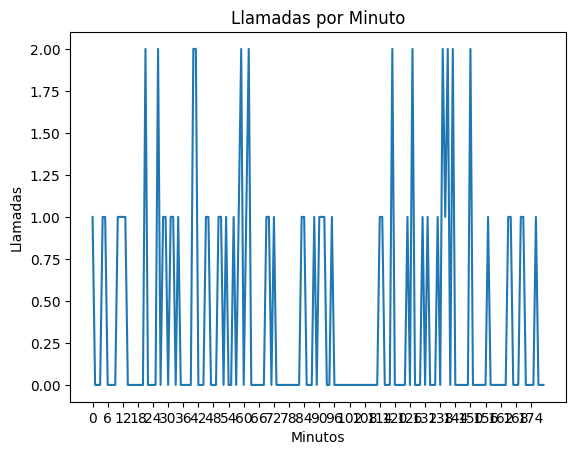

In [299]:
import matplotlib.pyplot as plt
# import numpy as np

# Parámetros
media_llamadas_por_min = 1/3    # 1 llamada cada 3 minutos
minutos_simuladas = 180

# Generar llegadas de llamadas
llamadas_por_minuto = generar_dist_acumulado(generar_poisson, media_llamadas_por_min, minutos_simuladas)
# llamadas_por_minuto = np.random.poisson(media_llamadas_por_minuto, minutos_simuladas)
print(f"Llamadas por minuto: {llamadas_por_minuto}")
# Total de llamadas en el día
total_llamadas =  sum(llamadas_por_minuto)
print(f"Total de llamadas en {minutos_simuladas} minutos: {total_llamadas}")






# plotear las  llamadas por minuto
plt.plot(llamadas_por_minuto)
plt.xlabel('Minutos')
plt.ylabel('Llamadas')
plt.title('Llamadas por Minuto')
plt.xticks(range(0, minutos_simuladas, 6))
plt.show()


In [149]:
def generar_exponencial(media):
  """
  Función para generar un número aleatorio a partir de una distribución exponencial
  """
  u = random.random()
  return -media * math.log(1 - u)


In [304]:

import numpy as np

# Parámetro de la distribución exponencial
media_tiempo_respuesta = 6

# tiempo_respuesta = generar_dist_acumulado(generar_exponencial, media_tiempo_respuesta, total_llamadas)
# tiempo2 = generar_exponencial(media_tiempo_respuesta)
# print(f"Tiempo de respuesta: {tiempo2} minutos")
# print(f"Tiempo de respuesta: {tiempo_respuesta} minutos")





In [305]:
import simpy

class CallCenter:
    def __init__(self, num_operadores ):
        self.env = simpy.Environment()
        self.operadores = simpy.Resource(self.env, capacity=num_operadores)

    def RecibirLlamada(self, nombre):
        print(f"{nombre} solicita una llamada en {self.env.now}")
        if self.operadores.count < self.operadores.capacity:
            with self.operadores.request() as req:
                yield req
                print(f"{nombre} se comunica con un operador en {self.env.now}")
                tiempo_llamada = generar_exponencial(media_tiempo_respuesta)
                yield self.env.timeout(tiempo_llamada)
                print(f"{nombre} finaliza la llamada en {self.env.now}")
        else:
            print(f"{nombre}'s call is lost at {self.env.now}")
            
for i in range(total_llamadas):
    callcenter = CallCenter(3)
    callcenter.env.process(callcenter.RecibirLlamada(f"Cliente {i}"))
    callcenter.env.run()

# test
# callcenter = CallCenter(3)
# print("CallCenter creado")
# callcenter.env.process(callcenter.RecibirLlamada("Cliente 1"))
# # callcenter.env.run()

# callcenter.env.process(callcenter.RecibirLlamada("Cliente 2"))
# callcenter.env.process(callcenter.RecibirLlamada("Cliente 3"))
# callcenter.env.process(callcenter.RecibirLlamada("Cliente 4"))
# callcenter.env.run()
# callcenter.env.process(callcenter.RecibirLlamada("Cliente 5"))
# callcenter.env.run()



Cliente 0 solicita una llamada en 0
Cliente 0 se comunica con un operador en 0
Cliente 0 finaliza la llamada en 6.0766133816773
Cliente 1 solicita una llamada en 0
Cliente 1 se comunica con un operador en 0
Cliente 1 finaliza la llamada en 3.942158058804978
Cliente 2 solicita una llamada en 0
Cliente 2 se comunica con un operador en 0
Cliente 2 finaliza la llamada en 14.646978626875192
Cliente 3 solicita una llamada en 0
Cliente 3 se comunica con un operador en 0
Cliente 3 finaliza la llamada en 19.159462798433847
Cliente 4 solicita una llamada en 0
Cliente 4 se comunica con un operador en 0
Cliente 4 finaliza la llamada en 8.141231635985111
Cliente 5 solicita una llamada en 0
Cliente 5 se comunica con un operador en 0
Cliente 5 finaliza la llamada en 0.7571172523594067
Cliente 6 solicita una llamada en 0
Cliente 6 se comunica con un operador en 0
Cliente 6 finaliza la llamada en 0.23191068674835003
Cliente 7 solicita una llamada en 0
Cliente 7 se comunica con un operador en 0
Cliente 

In [277]:
# test
callcenter = CallCenter(3)
print("CallCenter creado")

# Simular 3 horas de llamadas
for i in range(3):
    # Generar número de llamadas para la hora actual
    num_llamadas = llamadas_por_hora[i]
    for j in range(num_llamadas):
        
    callcenter.env.run()

CallCenter creado
aaaaaaaaaaaaaaa
Cliente hora:0 llamada:0 solicita una llamada en 0
aaaaaaaaaaaaaaa
Cliente hora:0 llamada:1 solicita una llamada en 0
aaaaaaaaaaaaaaa
Cliente hora:0 llamada:2 solicita una llamada en 0
aaaaaaaaaaaaaaa
Cliente hora:0 llamada:3 solicita una llamada en 0
Cliente hora:0 llamada:3's call is lost at 0
aaaaaaaaaaaaaaa
Cliente hora:0 llamada:4 solicita una llamada en 0
Cliente hora:0 llamada:4's call is lost at 0
aaaaaaaaaaaaaaa
Cliente hora:0 llamada:5 solicita una llamada en 0
Cliente hora:0 llamada:5's call is lost at 0
aaaaaaaaaaaaaaa
Cliente hora:0 llamada:6 solicita una llamada en 0
Cliente hora:0 llamada:6's call is lost at 0
aaaaaaaaaaaaaaa
Cliente hora:0 llamada:7 solicita una llamada en 0
Cliente hora:0 llamada:7's call is lost at 0
aaaaaaaaaaaaaaa
Cliente hora:0 llamada:8 solicita una llamada en 0
Cliente hora:0 llamada:8's call is lost at 0
aaaaaaaaaaaaaaa
Cliente hora:0 llamada:9 solicita una llamada en 0
Cliente hora:0 llamada:9's call is lost at